# 财经数据开源库

## Tushare社区
公众号上不少文章使用了tushare库获取财经和股票交易数据，当时用的是旧版本（tushare）。Tushare社区目前主要维护新版本：tushare pro，数据更稳定质量更高，可获取沪深股票行情、财务、市场参考等数据，以及指数（含国外股指）、基金、期货、期权、宏观经济、行业经济等财经数据，为金融量化爱好者节省了大量宝贵时间。此外，近期还增加了新闻联播的文本数据，为文本分析和数据挖掘提供了很好的素材。不过，新版本需要注册获取token才能免费使用，注册网址： 
[https://tushare.pro/register?reg=218422](https://tushare.pro/register?reg=218422) 。安装（进入cmd模式）：pip install tushare，或升级：pip install tushare --upgrade。下面以股票行情数据为例，展示下tushare如何获取数据。

### 股票行情数据
以股票行情数据为例，简要介绍如何获取数据。

In [1]:
#先引入后面分析、可视化等可能用到的库
import tushare as ts
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [2]:
#设置token
token='e0eeb08befd1f07516df2cbf9cbd58663f77fd72f92a04f290291c9d'
#ts.set_token(token)
pro = ts.pro_api(token)

#### 个股行情数据
pro,stock_basic(),参数：is_hs：是否沪深港通标的，N否、H沪股通、S深股通；list_status：上市状态，L上市、D退市、P暂停上市；exchange：交易所 SSE上交所，SZSE深交所，HKEX港交所。  
pro.daily(ts_code= 或 trade_date=)
日行情：daily;周行情：weekly;月行情：monthly

In [3]:
#获取当前上市的股票代码、简称、注册地、行业、上市时间等数据
basic=pro.stock_basic(list_status='L')
#查看前五行数据
basic.head(5)

,ts_code,symbol,name,area,industry,market,list_date
0,000001.SZ,000001,平安银行,深圳,银行,主板,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,主板,19910129
2,000004.SZ,000004,国农科技,深圳,生物制药,主板,19910114
3,000005.SZ,000005,世纪星源,深圳,房产服务,主板,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,主板,19920427


In [4]:
#获取平安银行日行情数据
pa=pro.daily(ts_code='000001.SZ', start_date='20180101', end_date='20190106')
pa.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20190104,9.24,9.82,9.22,9.75,9.28,0.47,5.0647,1481159.06,1422149.888
1,000001.SZ,20190103,9.18,9.33,9.15,9.28,9.19,0.09,0.9793,415537.95,384457.707
2,000001.SZ,20190102,9.39,9.42,9.16,9.19,9.38,-0.19,-2.0256,539386.32,498695.109
3,000001.SZ,20181228,9.31,9.46,9.31,9.38,9.28,0.10,1.0776,576604.00,541571.004
4,000001.SZ,20181227,9.45,9.49,9.28,9.28,9.30,-0.02,-0.2151,624593.27,586343.755


In [5]:
#K线图可视化
from pyecharts import Kline
pa.index=pd.to_datetime(pa.trade_date)
pa=pa.sort_index()
v1=list(pa.loc[:,['open','close','low','high']].values)
t=pa.index
v0=list(t.strftime('%Y%m%d'))
kline = Kline("平安银行K线图",title_text_size=15)
kline.add("", v0, v1,is_datazoom_show=True,mark_line=["average"],
         mark_point=["max", "min"],mark_point_symbolsize=60,
         mark_line_valuedim=['highest', 'lowest'] )
#kline.render("上证指数图.html")
kline

In [5]:
#定义获取多只股票函数：
def get_stocks_data(stocklist,start,end):
    all_data={}
    for code in stocklist:
        all_data[code]=pro.daily(ts_code=code, start_date=start, end_date=end)
    return all_data

In [36]:
#保存本地
def save_data(all_data):
    for code,data in all_data.items():
        data.to_csv('c:/zjy/stock_data/'+code+'.csv',header=True, index=False)

In [19]:
stocklist=list(basic.ts_code)[:15]
start=''
end=''
all_data=get_stocks_data(stocklist,start,end)

In [37]:
all_data['000002.SZ'].tail()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
3995,000002.SZ,20010906,14.91,15.38,14.91,15.31,14.94,0.37,2.48,136954.70,208439.4173
3996,000002.SZ,20010905,15.08,15.15,14.89,14.94,15.08,-0.14,-0.93,62187.49,93517.2968
3997,000002.SZ,20010904,14.64,15.17,14.60,15.08,14.64,0.44,3.01,97063.37,145421.3974
3998,000002.SZ,20010903,14.62,14.85,14.50,14.64,14.60,0.04,0.27,27092.22,39760.1352
3999,000002.SZ,20010831,14.60,14.75,14.55,14.60,14.60,0.00,0.00,16056.11,23474.1337


In [38]:
#将数据保存到本地
save_data(all_data)

In [26]:
#读取本地文件夹里所有文件
import os
#文件存储路径
file='c:/zjy/stock_data/'
g=os.walk(file)
filenames=[]
for path,d,filelist in g:
    for filename in filelist:
        filenames.append(os.path.join(filename))
print(filenames)

['000001.SZ.csv', '000002.SZ.csv', '000004.SZ.csv', '000005.SZ.csv', '000006.SZ.csv', '000007.SZ.csv', '000008.SZ.csv', '000009.SZ.csv', '000010.SZ.csv', '000011.SZ.csv', '000012.SZ.csv', '000014.SZ.csv', '000016.SZ.csv', '000017.SZ.csv', '000018.SZ.csv']


In [39]:
#将读取的数据文件放入一个字典中
df={}
#从文件名中分离出股票代码
code=[name.split('.')[0] for name in filenames]
for i in range(len(filenames)):
    filename=file+filenames[i]
    df[code[i]]=pd.read_csv(filename)

In [40]:
#查看第一只股票前五行数据
df[code[0]].head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20190104,9.24,9.82,9.22,9.75,9.28,0.47,5.0647,1481159.06,1422149.888
1,000001.SZ,20190103,9.18,9.33,9.15,9.28,9.19,0.09,0.9793,415537.95,384457.707
2,000001.SZ,20190102,9.39,9.42,9.16,9.19,9.38,-0.19,-2.0256,539386.32,498695.109
3,000001.SZ,20181228,9.31,9.46,9.31,9.38,9.28,0.10,1.0776,576604.00,541571.004
4,000001.SZ,20181227,9.45,9.49,9.28,9.28,9.30,-0.02,-0.2151,624593.27,586343.755


#### 指数数据
pro.index_daily(ts_code=)

In [9]:
ts.get_k_data('sh',start='1990-01-01')

,date,open,close,high,low,volume,code
0,1990-12-19,113.10,113.10,113.10,113.10,2650.0,sh
1,1990-12-20,113.10,113.50,113.50,112.85,1990.0,sh
2,1990-12-21,113.50,113.50,113.50,113.40,1190.0,sh
3,1990-12-24,113.50,114.00,114.00,113.30,8070.0,sh
4,1990-12-25,114.00,114.10,114.20,114.00,2780.0,sh
5,1990-12-26,114.40,114.30,114.40,114.20,310.0,sh
6,1990-12-27,114.30,114.25,114.30,114.10,6110.0,sh
7,1990-12-28,114.30,114.40,114.40,114.20,4840.0,sh
8,1990-12-31,114.70,114.70,114.80,114.60,2400.0,sh
9,1991-01-02,115.00,114.90,115.00,114.80,520.0,sh


In [6]:
def get_index_data(indexs):
    '''indexs是字典格式'''
    index_data={}
    for name,code in indexs.items():
        df=pro.index_daily(ts_code=code)
        df.index=pd.to_datetime(df.trade_date)   
        index_data[name]=df.sort_index()
    return index_data

In [7]:
#获取常见股票指数行情
indexs={'上证综指': '000001.SH','深证成指': '399001.SZ',
         '沪深300': '000300.SH','创业板指': '399006.SZ',
          '上证50': '000016.SH', '中证500': '000905.SH',
         '中小板指': '399005.SZ','上证180': '000010.SH'}
index_data=get_index_data(indexs)
index_data['上证综指'].head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
1990-12-19,000001.SH,19901219,99.98,96.05,99.98,95.79,100.00,-0.02,-0.0200,1260.0,494.311
1990-12-20,000001.SH,19901220,104.39,104.30,104.39,99.98,99.98,4.41,4.4109,197.0,84.992
1990-12-21,000001.SH,19901221,109.13,109.07,109.13,103.73,104.39,4.74,4.5407,28.0,16.096
1990-12-24,000001.SH,19901224,114.55,113.57,114.55,109.13,109.13,5.42,4.9666,32.0,31.063
1990-12-25,000001.SH,19901225,120.25,120.09,120.25,114.55,114.55,5.70,4.9760,15.0,6.510


In [8]:
df=index_data['上证综指']
df.to_csv('sh_index.csv')

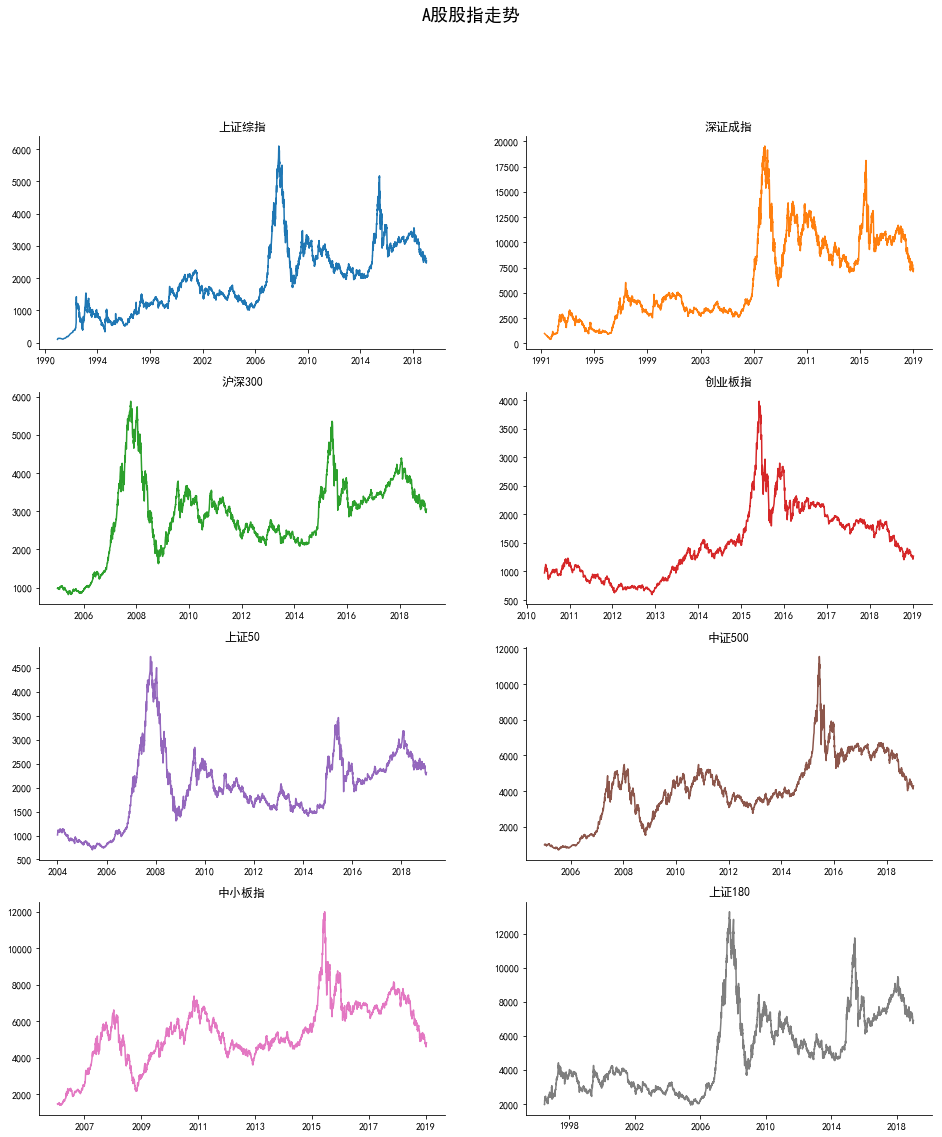

In [50]:
#对股价走势进行可视化分析
subjects =list(index_data.keys())
#每个子图的title
plot_pos = [421,422,423,424,425,426,427,428] # 每个子图的位置
new_colors = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f','#bcbd22','#17becf']

fig = plt.figure(figsize=(16,18))
fig.suptitle('A股股指走势',fontsize=18)
for pos in np.arange(len(plot_pos)):       
    ax = fig.add_subplot(plot_pos[pos]) 
    y_data =index_data[subjects[pos]]['close']    
    b = ax.plot(y_data,color=new_colors[pos])   
    ax.set_title(subjects[pos])    
    # 将右上边的两条边颜色设置为空，相当于抹掉这两条边
    ax = plt.gca()  
    ax.spines['right'].set_color('none') 
    ax.spines['top'].set_color('none')    
plt.show()  

# 证券宝（baostock）
也是免费、开源的证券数据平台。 提供大量准确、完整的证券历史行情数据、上市公司财务数据等。 通过python API获取证券数据信息，满足量化交易投资者、数量金融爱好者、计量经济从业者数据需求。 返回的数据格式： pandas DataFrame类型，以便于用pandas/NumPy/Matplotlib进行数据分析和可视化。 证券宝链接地址:[http://baostock.com/baostock/index.php/Python_API文档](http://baostock.com/baostock/index.php/Python_API文档)  。安装：进入cmd模式，pip install baostock

In [63]:
import baostock as bs
#### 登陆系统 ####
lg = bs.login()

login success!


In [64]:
#### 获取历史K线数据 ####
# query_history_k_data()
fields= "date,code,open,high,low,close"
#,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,isST
rs = bs.query_history_k_data("sh.000001", fields,
    start_date='2000-01-01', end_date='2018-09-07', 
    frequency="d", adjustflag="2") 
#frequency="d"取日k线，adjustflag="3"默认不复权，1：后复权；2：前复权

In [65]:
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
result.index=pd.to_datetime(result.date)
#### 结果集输出到csv文件 ####
#result.to_csv("c:/zjy/history_k_data.csv", encoding="gbk", index=False)
result.head()
#### 登出系统 ####
#bs.logout()

,date,code,open,high,low,close
date,,,,,,
2006-01-04,2006-01-04,sh.000001,1163.8780,1181.0040,1161.9060,1180.9630
2006-01-05,2006-01-05,sh.000001,1183.3050,1197.8370,1180.4510,1197.2690
2006-01-06,2006-01-06,sh.000001,1198.8110,1215.5360,1191.6140,1209.4220
2006-01-09,2006-01-09,sh.000001,1210.3200,1217.3140,1205.2480,1215.6680
2006-01-10,2006-01-10,sh.000001,1215.8480,1220.7560,1203.6510,1220.6180


In [66]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3086 entries, 2006-01-04 to 2018-09-07
Data columns (total 6 columns):
date     3086 non-null object
code     3086 non-null object
open     3086 non-null object
high     3086 non-null object
low      3086 non-null object
close    3086 non-null object
dtypes: object(6)
memory usage: 168.8+ KB


In [67]:
#将某些object转化numeric
result=result.apply(pd.to_numeric, errors='ignore')
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3086 entries, 2006-01-04 to 2018-09-07
Data columns (total 6 columns):
date     3086 non-null object
code     3086 non-null object
open     3086 non-null float64
high     3086 non-null float64
low      3086 non-null float64
close    3086 non-null float64
dtypes: float64(4), object(2)
memory usage: 168.8+ KB


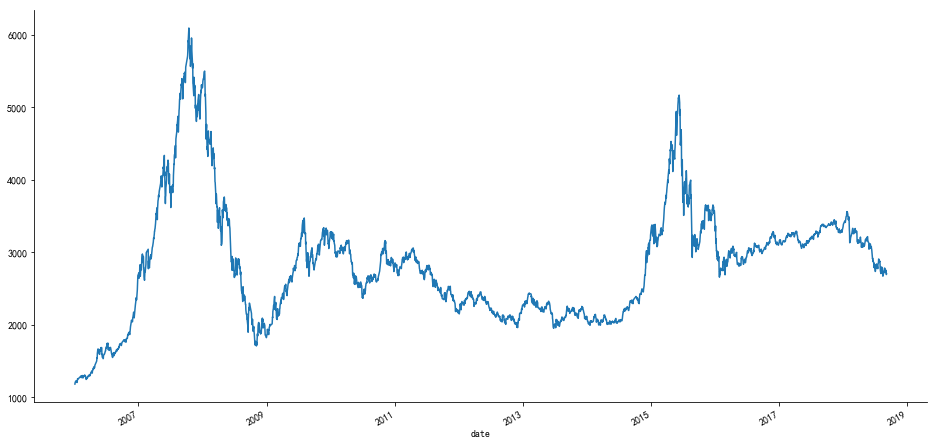

In [68]:
result.close.plot(figsize=(16,8))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')    
plt.show() 

# Yahool：获取国外股票数据
原来的雅虎财经Python开源库2018年后已不在维护，还好有大神推出了雅虎财经的修复版本，使用pip install fix_yahoo_finance安装

In [69]:
import fix_yahoo_finance as fy
fy.pdr_override()

In [70]:
def get_data(tick,start_date="2000-01-01", end_date="2019-01-07"):
    data = fy.download(tick, start=start_date, end=end_date)
    return data

In [76]:
tickers=['AAPL', 'GOOG','AMZN','FB']
all_data = {}
for ticker in tickers:
    all_data[ticker]=get_data(ticker)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


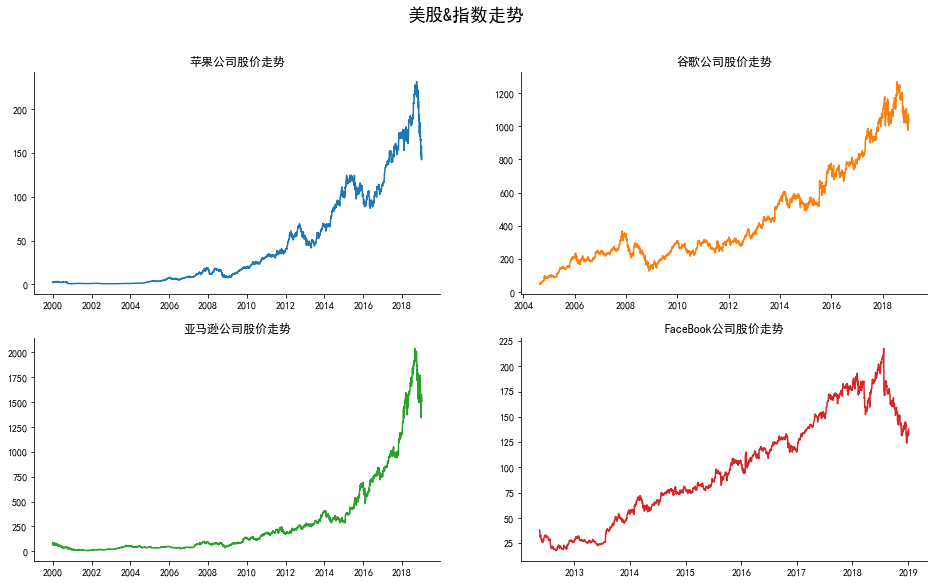

In [81]:
subjects = ['苹果公司股价走势','谷歌公司股价走势',
            '亚马逊公司股价走势','FaceBook公司股价走势'] 
#每个子图的title
plot_pos = [221,222,223,224] # 每个子图的位置
new_colors = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f','#bcbd22','#17becf']

fig = plt.figure(figsize=(16,9))
fig.suptitle('美股&指数走势',fontsize=18)
for pos in np.arange(len(plot_pos)):       
    ax = fig.add_subplot(plot_pos[pos]) 
    y_data = all_data[tickers[pos]]['Adj Close']    
    b = ax.plot(y_data,color=new_colors[pos])   
    ax.set_title(subjects[pos])  
    ax = plt.gca()  
    ax.spines['right'].set_color('none') 
    ax.spines['top'].set_color('none') 
plt.show()    

In [82]:
WorldStockIndexList = {
    '000001.SS':'中国上证指数',
    '^DJI':'道琼斯工业平均指数',
    '^IXIC':'纳斯达克综合指数',
    '^N225':'日本日经225指数',
    '^HSI' :'香港恒生指数',
    '^FCHI':'法国CAC40指数', 
    '^FTSE':'英国富时100指数', 
    '^GDAXI':'德国法兰克福DAX指数'}
world_data={}
for ticker in WorldStockIndexList.keys():
    world_data[ticker]=get_data(ticker)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


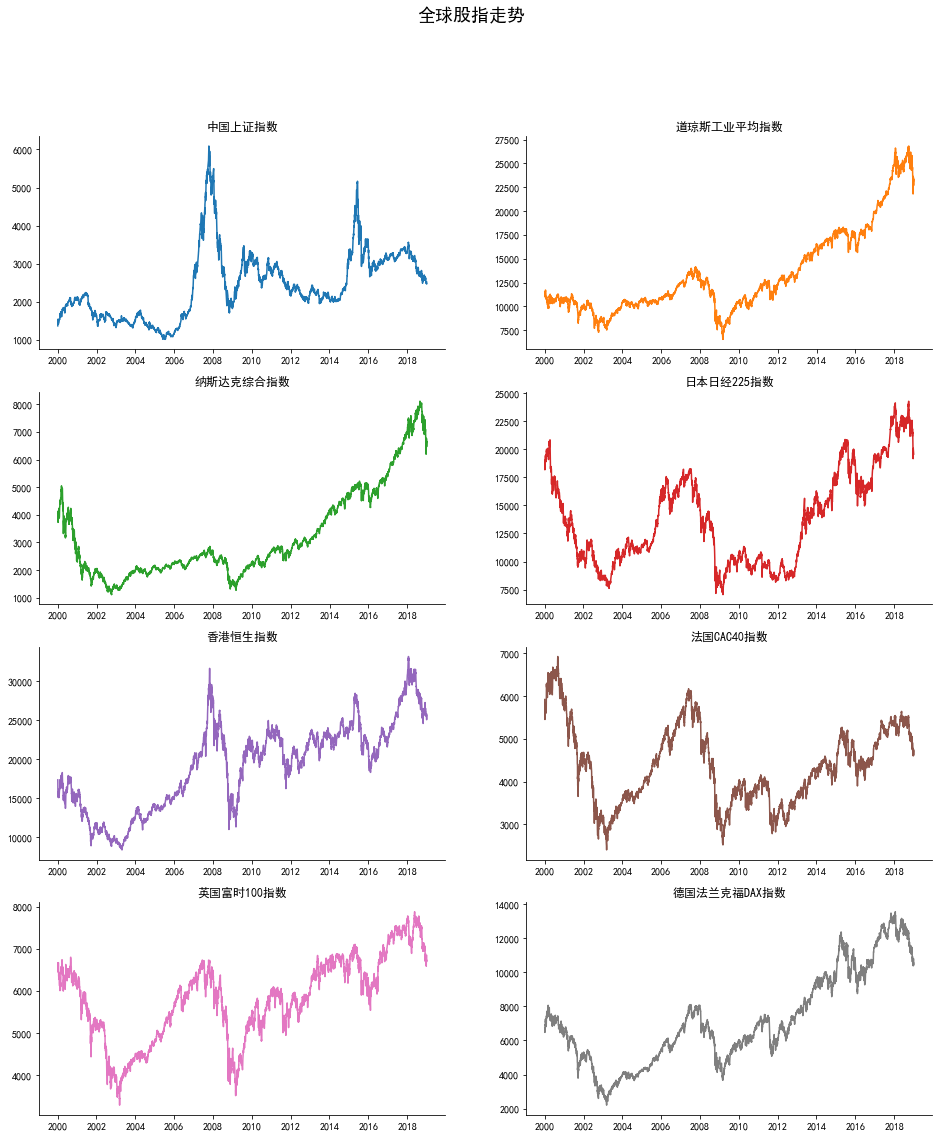

In [88]:
subjects =list(WorldStockIndexList.values())
tickers=list(WorldStockIndexList)
#每个子图的title
plot_pos = [421,422,423,424,425,426,427,428] # 每个子图的位置
new_colors = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f','#bcbd22','#17becf']

fig = plt.figure(figsize=(16,18))
fig.suptitle('全球股指走势',fontsize=18)
for pos in np.arange(len(plot_pos)):       
    ax = fig.add_subplot(plot_pos[pos]) 
    y_data =world_data[tickers[pos]]['Adj Close']    
    b = ax.plot(y_data,color=new_colors[pos])   
    ax.set_title(subjects[pos])    
    ax = plt.gca()  
    ax.spines['right'].set_color('none') 
    ax.spines['top'].set_color('none') 
plt.show()  